# Project: Write a Data Science Blog Post

## Business Understanding

#### Explore the StackOverflow survey data over years

For people who decide to step into data science, this small project might help you get started.

This project explores the stackoverflow survey over the recent years.

Here is the code written in Jupyter Notebook shared in Github.

Let’s get started!

First, let’s simply just look at the schema of the survey, and have an idea of what question and answer will we get from this dataset.

Then, we might want to explore and analyze the dataset by asking a couple of questions ourselves.

For example:

#### 1. [What are the most popular coding language over time?](#language)
#### 2. [What are the job satisfication observe over time?](#jobsatisfy)
#### 3. [How is the percentage of the countries changed over the years?](#country)

Following are the explanations that walk you through answering the above 3 questions.

If you are interested in more detail of modeling, you can have a look at this question:
[What are the top 10 factors that affect salary over time?](#10factors)

In [1]:
#load python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime 
import matplotlib.ticker as mtick
import seaborn as sns
import re
%matplotlib inline

## Data Understanding

In [2]:
#load dataset for analysis
df_2017 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2017/survey_results_public.csv',low_memory=False)
df_2018 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2018/survey_results_public.csv',low_memory=False)
df_2019 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2019/survey_results_public.csv',low_memory=False)
df_2020 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2020/survey_results_public.csv',low_memory=False)
df_2021 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2021/survey_results_public.csv',low_memory=False)
schema_2017 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2017/survey_results_schema.csv',low_memory=False)
schema_2018 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2018/survey_results_schema.csv',low_memory=False)
schema_2019 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2019/survey_results_schema.csv',low_memory=False)
schema_2020 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2020/survey_results_schema.csv',low_memory=False)
schema_2021 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2021/survey_results_schema.csv',low_memory=False)

In [3]:
print('df_2017 has {} rows, {} columns'.format(df_2017.shape[0],df_2017.shape[1]))
print('df_2018 has {} rows, {} columns'.format(df_2018.shape[0],df_2018.shape[1]))
print('df_2019 has {} rows, {} columns'.format(df_2019.shape[0],df_2019.shape[1]))
print('df_2020 has {} rows, {} columns'.format(df_2020.shape[0],df_2020.shape[1]))

df_2017 has 51392 rows, 154 columns
df_2018 has 98855 rows, 129 columns
df_2019 has 88883 rows, 85 columns
df_2020 has 64461 rows, 61 columns


## Prepare Data

#### helper function

In [4]:
def item_frequency(col):
    frequency = {}
    for item in col.dropna():
        for element in re.split(';\s|;', item):
            if element in frequency:
                frequency[element] += 1
            else:
                frequency[element] = 1
    df_frequency = pd.DataFrame.from_dict(frequency, orient='index', columns=['frequency'])/col.shape[0]
    return df_frequency

## Evaluation

<a id="language"></a>
#### 1. What are the most popular coding language over time?

In [5]:
language_df1 = item_frequency(df_2017['HaveWorkedLanguage']).nlargest(6, 'frequency')
language_df2 = item_frequency(df_2018['LanguageWorkedWith']).drop(['CSS'], axis=0).rename(index={'HTML': 'HTML/CSS','Bash/Shell':'Bash/Shell/PowerShell'}).nlargest(6, 'frequency')
language_df3 = item_frequency(df_2019['LanguageWorkedWith']).nlargest(6, 'frequency')
language_df4 = item_frequency(df_2020['LanguageWorkedWith']).nlargest(6, 'frequency')
language_df5 = item_frequency(df_2021['LanguageHaveWorkedWith']).rename(index={'Bash/Shell':'Bash/Shell/PowerShell'}).nlargest(6, 'frequency')
language_df_new = pd.concat([language_df1, language_df2, language_df3, language_df4, language_df5], axis=1)
language_df_new.columns = ['2017','2018','2019','2020', '2021']
language_df_transposed = language_df_new.T.dropna(axis=1, thresh=2)

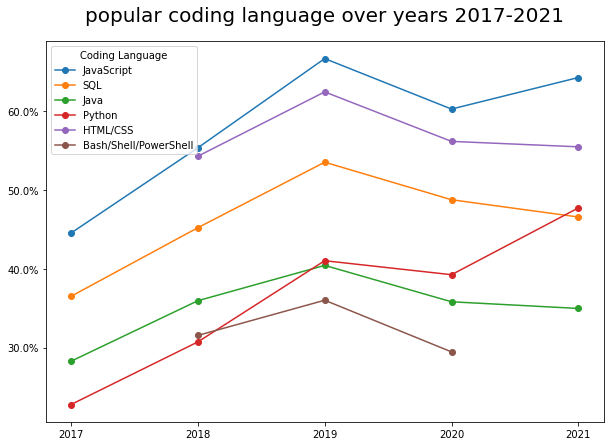

In [6]:
ax1 = language_df_transposed.plot(figsize=(10,7), marker='o')
x = list(range(0,len(language_df_transposed.index)))
ax1.set_xticks(x)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.title('popular coding language over years 2017-2021',fontsize=20,pad=20)
plt.legend(fontsize=10, loc ="upper left", title = 'Coding Language')
plt.show()

JavaScript is the most used language since 2017.

HTML/CSS is the second most used language since 2018.

SQL is the third most used language until 2020.

Python is the least used language in the graph in 2017, but increase very fast, and became the third most used language in 2021.

<a id="jobsatisfy"></a>
#### 2. What are the job satisfaction observe over time?

Rescaled the Job Satisfaction from category to 0-10 rating 

In [7]:
Job_satisfaction = df_2017['JobSatisfaction'].dropna().to_frame()
Job_satisfaction['year'] = 2017
Job_satisfaction = Job_satisfaction.rename(columns={"JobSatisfaction": "rate"})
Job_satisfaction_total = Job_satisfaction[['rate','year']]

In [8]:
Job_satisfaction = df_2018['JobSatisfaction'].dropna().to_frame()

conditions = [
    (Job_satisfaction['JobSatisfaction'] == 'Extremely satisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Moderately satisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Slightly satisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Neither satisfied nor dissatisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Slightly dissatisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Moderately dissatisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Extremely dissatisfied'),
    ]

values = [10, 8.33, 6.67, 5, 3.33, 1.67, 0]

Job_satisfaction['rate'] = np.select(conditions, values)
Job_satisfaction['year'] = 2018

In [9]:
Job_satisfaction_total = pd.concat([Job_satisfaction_total, Job_satisfaction[['rate','year']]], ignore_index=True, sort=False)

In [10]:
Job_satisfaction = df_2019['JobSat'].dropna().to_frame()

conditions = [
    (Job_satisfaction['JobSat'] == 'Very satisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly satisfied'),
    (Job_satisfaction['JobSat'] == 'Neither satisfied nor dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Very dissatisfied'),
    ]

values = [10,10-2.5,10-2.5*2,10-2.5*3,10-2.5*4]

Job_satisfaction['rate'] = np.select(conditions, values)
Job_satisfaction['year'] = 2019

In [11]:
Job_satisfaction_total = pd.concat([Job_satisfaction_total, Job_satisfaction[['rate','year']]], ignore_index=True, sort=False)

In [12]:
Job_satisfaction = df_2020['JobSat'].dropna().to_frame()

conditions = [
    (Job_satisfaction['JobSat'] == 'Very satisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly satisfied'),
    (Job_satisfaction['JobSat'] == 'Neither satisfied nor dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Very dissatisfied'),
    ]

values = [10,10-2.5,10-2.5*2,10-2.5*3,10-2.5*4]

Job_satisfaction['rate'] = np.select(conditions, values)
Job_satisfaction['year'] = 2020

In [13]:
Job_satisfaction_total = pd.concat([Job_satisfaction_total, Job_satisfaction[['rate','year']]], ignore_index=True, sort=False)

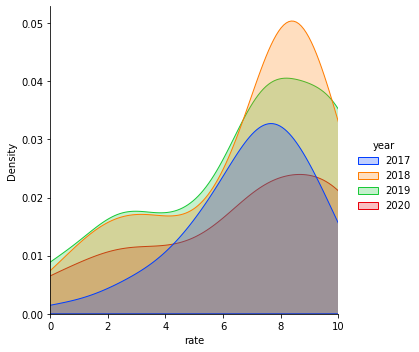

In [14]:
sns.displot(Job_satisfaction_total, x='rate', hue='year',kind='kde', fill=True, bw_adjust=4,
            color=['red','green','yellow','blue'], palette=sns.color_palette('bright')[:4]);
plt.xlim(0,10);

The Job Satisfaction rate is from 0–10, which ranges from extremely bad to extremely good.

We can have a clear idea of job satisfaction from the curves that fit the job satisfaction model.

In 2017, there seems only one peak in the curve, which means most people agreed are satisfied with their job.

In 2018 and 2019, most people are very satisfied with their job, however, there are more people not satisfied with their job than last year.

In 2020, the number of people who are very satisfied with their jobs is getting lower.

<a id="country"></a>
#### 3. How is the percentage of the countries changed over the years?

In [15]:
df1 = df_2017['Country'].value_counts(normalize=True).head().to_frame().rename(columns={"Country": 2017})
df2 = df_2018['Country'].value_counts(normalize=True).head().to_frame().rename(columns={"Country": 2018})
df3 = df_2019['Country'].value_counts(normalize=True).head().to_frame().rename(columns={"Country": 2019})
df4 = df_2020['Country'].value_counts(normalize=True).head().to_frame().rename(columns={"Country": 2020})

In [16]:
df = pd.concat([df1,df2,df3,df4],axis=1).T.reset_index().rename(columns={"index": "year"})

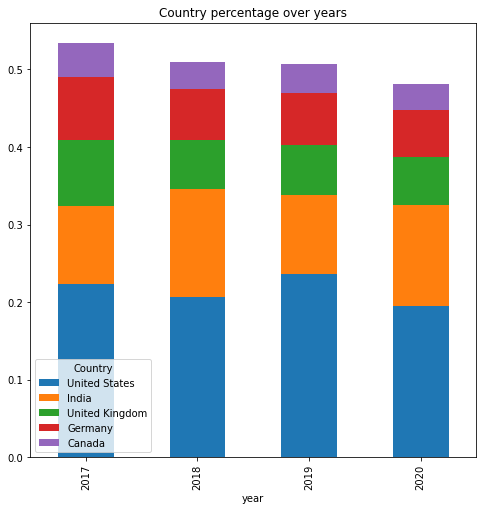

In [17]:
df.plot(x='year', kind='bar', stacked=True,
        title='Country percentage over years',figsize=(8,8));
plt.legend(loc ="lower left", title = 'Country');

The above figure shows the top percentages of countries that answered the StackOverflow survey.

We can see that the United States take 20% over four years from 2017–2020 ranking #1.

India takes #2 place which shares around 10% of the total each year.

The third place is the United Kingdom.

## Conclusion

This is just a very preliminary analysis of the survey data.

There is many more conclusion we can draw here simply by utilizing different python packages.

There is an extra more challenging question left in the notebook unposted!

If you are interested to get an idea of how to build a linear regression model and use the model to find the correlation between different variables, you are welcome to use the code in the notebook.

<a id="10factors"></a>
#### What are the top 10 factors that affect salary over time?

In [18]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    '''
    # Drop rows with missing salary values
    resp = df.columns[np.logical_or(df.columns == 'ConvertedComp', df.columns ==  'Salary')]
    df = df.dropna(subset=resp, axis=0)
    y = df[resp]
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary', 'ConvertedComp', 'CompTotal'], axis=1, errors='ignore')
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for var in num_vars:
        df[var].fillna((df[var].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).columns
    for var in cat_vars:
        df2 = df[var].str.split(";").explode().reset_index()
        df2 = df2.pivot(index="index", columns=var, values=var)
        df = pd.concat([df.drop(var, axis=1), df2], axis=1)
    
    X = pd.get_dummies(df)
    X = X.dropna(axis=1)
    nunique = X.nunique()
    cols_to_drop = nunique[nunique == 1].index
    X = X.drop(cols_to_drop, axis=1)
    
    df = pd.concat([y.apply(pd.to_numeric, errors='coerce'),X],axis=1)
    df = df[np.squeeze(df[resp]>0)]
    
    y = df[resp]
    X = df.drop(resp,axis=1)
    return X, y

In [19]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.ylim([0, 1])
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    #lm_model = LinearRegression()
    lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [20]:
start_time = datetime.now() 

X, y = clean_data(df_2017)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
print(X.shape[0])
print(X.shape[1])

Time elapsed (hh:mm:ss.ms) 0:00:51.200899
12885
1364


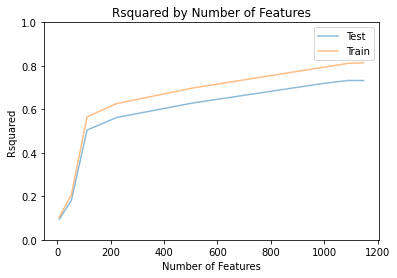

In [21]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [10000, 5000, 3500, 2500, 1000, 100, 50, 30]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [22]:
start_time = datetime.now() 

X, y = clean_data(df_2018)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
print(X.shape[0])
print(X.shape[1])

Time elapsed (hh:mm:ss.ms) 0:01:47.022613
49173
977


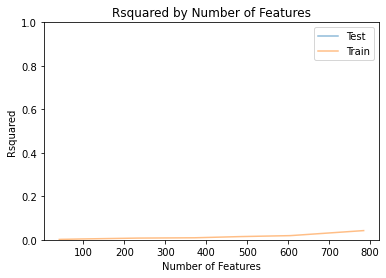

In [23]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [50000, 40000, 30000, 20000, 10000, 5000, 2500, 1000, 100]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [24]:
start_time = datetime.now() 

X, y = clean_data(df_2019)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
print(X.shape[0])
print(X.shape[1])

Time elapsed (hh:mm:ss.ms) 0:02:03.989870
55624
1107


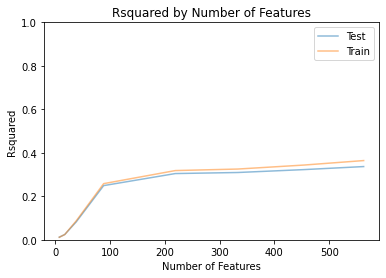

In [25]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [50000, 40000, 30000, 20000, 10000, 5000, 2500, 1000]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [26]:
start_time = datetime.now() 

X, y = clean_data(df_2020)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
print(X.shape[0])
print(X.shape[1])

Time elapsed (hh:mm:ss.ms) 0:00:51.379129
34614
987


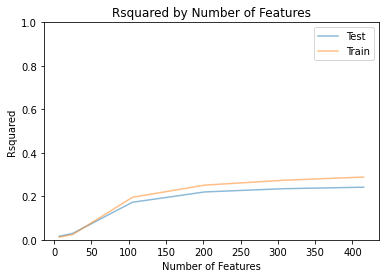

In [27]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [30000, 20000, 10000, 5000, 2500, 1000]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)